# 1.0 Import Libraries and Dataset


In [ ]:
!pip install pandas-profiling==2.9.0

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

In [33]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403000 entries, 0 to 2402999
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

In [ ]:
pandas_profiling.ProfileReport(data)

# 2.0 Pre-processing and Cleaning

In [34]:
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [ ]:
data.country_region.unique()

In [46]:
data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns = ["country","state","city","date","retail","grocery","parks","transit","workplaces","residential"]
data_br.date = pd.to_datetime(data_br.date)
data_br.index = data_br.date
data_br.drop(labels="date",axis=1,inplace=True) 
data_br

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...
2020-09-03,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-4.0,NaN
2020-09-04,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-1.0,NaN
2020-09-05,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
data_br.info()

In [47]:
data_br.loc[~data_br.state.isnull()]

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,Federal District,NaN,10.0,7.0,-8.0,8.0,8.0,0.0
2020-02-16,Brazil,Federal District,NaN,11.0,6.0,-10.0,4.0,0.0,2.0
2020-02-17,Brazil,Federal District,NaN,2.0,4.0,-1.0,11.0,22.0,-2.0
2020-02-18,Brazil,Federal District,NaN,1.0,4.0,2.0,14.0,22.0,-2.0
2020-02-19,Brazil,Federal District,NaN,-2.0,0.0,-3.0,9.0,20.0,-2.0
...,...,...,...,...,...,...,...,...,...
2020-09-03,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-4.0,NaN
2020-09-04,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-1.0,NaN
2020-09-05,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,0.0,NaN


# 3.0 A first figure

In [49]:
data_br.head()

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0


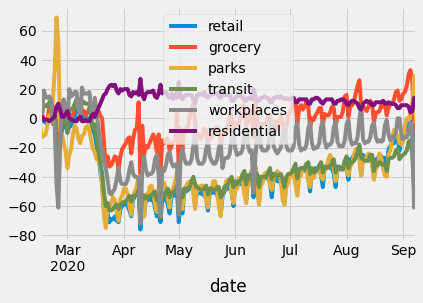

In [54]:
data_br.loc[data_br.state.isnull(),"retail":].plot()

In [53]:
plt.style.use("fivethirtyeight")

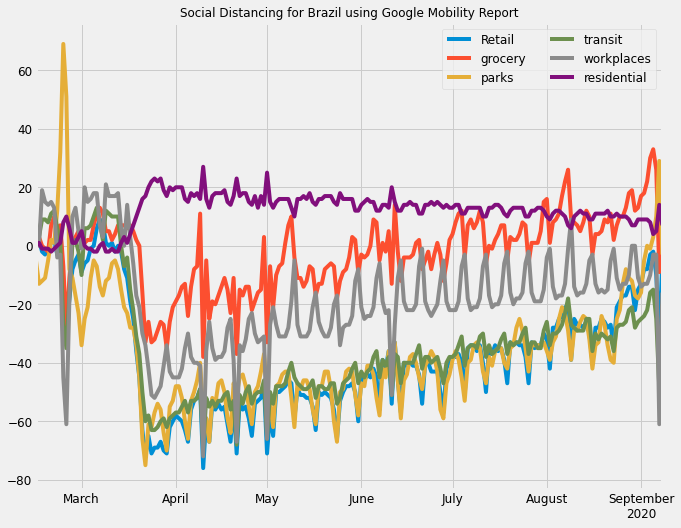

In [69]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
data_br.loc[data_br.state.isnull(),"retail":].plot(ax=ax)

handles, labels = ax.get_legend_handles_labels()
labels[0] = "Retail"
ax.legend(handles,labels,ncol=2,fontsize=12)

ax.set_xticklabels(["","March","April","May","June","July","August","September\n2020"],fontsize=12)
ax.set_xlabel("")
ax.yaxis.set_tick_params(labelsize=12)

ax.set_title("Social Distancing for Brazil using Google Mobility Report", fontsize=12)

plt.savefig("first.png",dpi=300)
plt.show()

# 4.0 Moving Average

In [75]:
data_br.loc[data_br.state.isnull(),"retail":].rolling(window=7).mean().head(10)

,retail,grocery,parks,transit,workplaces,residential
date,,,,,,
2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21,0.571429,3.000000,-6.142857,8.571429,11.714286,-0.714286
2020-02-22,-0.571429,3.285714,-3.714286,8.285714,10.285714,-0.714286
2020-02-23,-0.285714,3.857143,2.714286,8.142857,9.857143,-0.714286


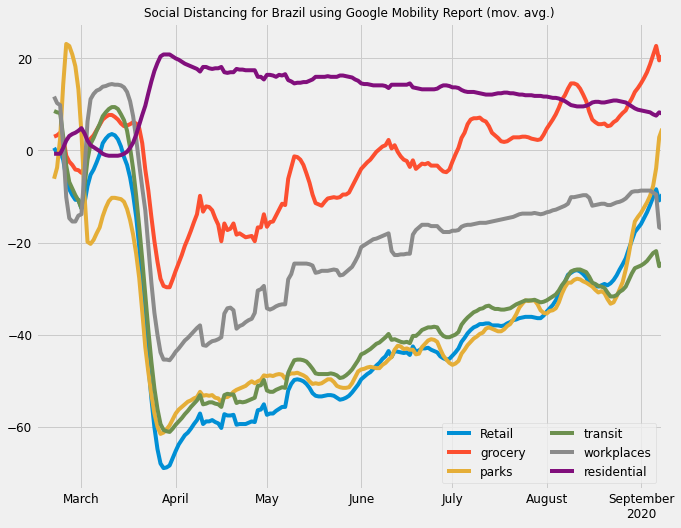

In [78]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
data_br.loc[data_br.state.isnull(),"retail":].rolling(window=7).mean().plot(ax=ax)

handles, labels = ax.get_legend_handles_labels()
labels[0] = "Retail"
ax.legend(handles,labels,ncol=2,fontsize=12)

ax.set_xticklabels(["","March","April","May","June","July","August","September\n2020"],fontsize=12)
ax.set_xlabel("")
ax.yaxis.set_tick_params(labelsize=12)

ax.set_title("Social Distancing for Brazil using Google Mobility Report (mov. avg.)", fontsize=12)

plt.savefig("first.png",dpi=300)
plt.show()

# 5.0 Groupby

In [79]:
data_br.head()

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0


In [85]:
data_br.state.unique()

array([nan, 'Federal District', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [84]:
data_br.state = data_br.state.str.replace("State of ","")

In [87]:
data_br_state = data_br.loc[~data_br.state.isnull() & data_br.city.isnull()].copy()
data_br_state.head()

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,Federal District,NaN,10.0,7.0,-8.0,8.0,8.0,0.0
2020-02-16,Brazil,Federal District,NaN,11.0,6.0,-10.0,4.0,0.0,2.0
2020-02-17,Brazil,Federal District,NaN,2.0,4.0,-1.0,11.0,22.0,-2.0
2020-02-18,Brazil,Federal District,NaN,1.0,4.0,2.0,14.0,22.0,-2.0
2020-02-19,Brazil,Federal District,NaN,-2.0,0.0,-3.0,9.0,20.0,-2.0


In [94]:
data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()["retail"][["Rio Grande do Norte","Paraíba"]]

state,Rio Grande do Norte,Paraíba
date,,
2020-02-15,5.0,2.0
2020-02-16,-3.0,-7.0
2020-02-17,3.0,-7.0
2020-02-18,-1.0,-3.0
2020-02-19,-8.0,-4.0
...,...,...
2020-09-04,-4.0,-4.0
2020-09-05,2.0,2.0
2020-09-06,-9.0,-8.0


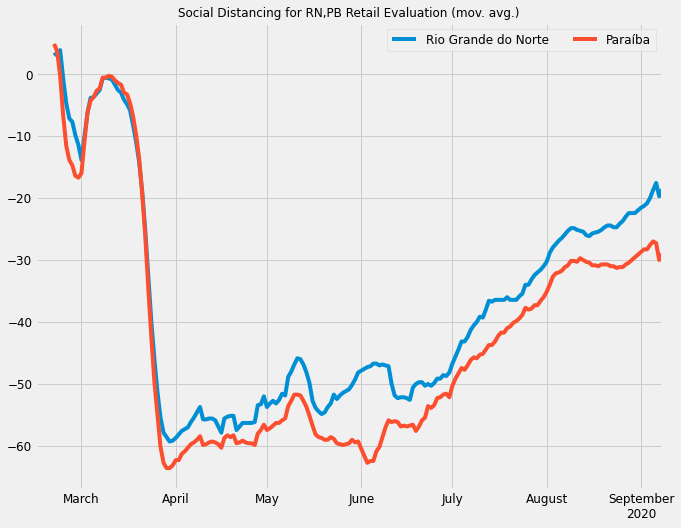

In [97]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()["transit"][["Rio Grande do Norte","Paraíba"]].rolling(window=7).mean().plot(ax=ax)

handles, labels = ax.get_legend_handles_labels()
#labels[0] = "Retail"
ax.legend(handles,labels,ncol=2,fontsize=12)

ax.set_xticklabels(["","March","April","May","June","July","August","September\n2020"],fontsize=12)
ax.set_xlabel("")
ax.yaxis.set_tick_params(labelsize=12)

ax.set_title("Social Distancing for RN,PB Retail Evaluation (mov. avg.)", fontsize=12)

plt.savefig("first.png",dpi=300)
plt.show()

# 6.0 All in One

In [110]:
data_br_state.head()

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,Federal District,NaN,10.0,7.0,-8.0,8.0,8.0,0.0
2020-02-16,Brazil,Federal District,NaN,11.0,6.0,-10.0,4.0,0.0,2.0
2020-02-17,Brazil,Federal District,NaN,2.0,4.0,-1.0,11.0,22.0,-2.0
2020-02-18,Brazil,Federal District,NaN,1.0,4.0,2.0,14.0,22.0,-2.0
2020-02-19,Brazil,Federal District,NaN,-2.0,0.0,-3.0,9.0,20.0,-2.0


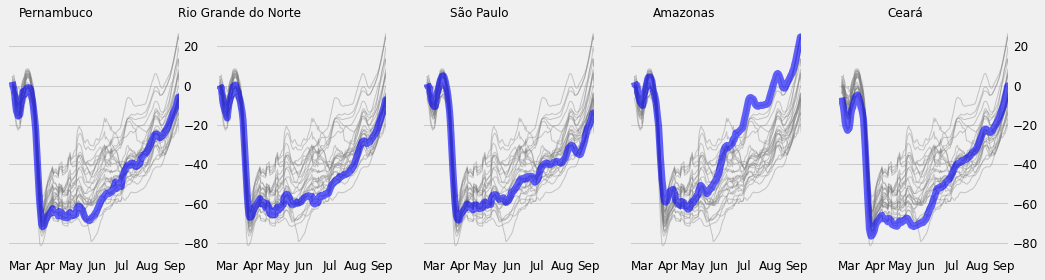

In [106]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(16,4))

item = "retail" #grocery, parks, transit, workplaces, residential
states = ["Pernambuco","Rio Grande do Norte","São Paulo","Amazonas","Ceará"]

for i,state in enumerate(states):
  data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()[item].rolling(window=7).mean().plot(legend=False,color="grey",linewidth=1, alpha=0.4, ax=ax[i])
  data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()[item][state].rolling(window=7).mean().plot(legend=False,color="blue",linewidth=7, alpha=0.6, ax=ax[i])
  ax[i].set_title(state,fontsize=12,ha='right')
  ax[i].xaxis.grid(False)
  ax[i].set_xlabel("")
  
  ax[i].set_xticklabels(["","Mar","Apr","May","Jun","Jul","Aug","Sep"])
  ax[i].xaxis.set_tick_params(labelsize=12)
  ax[i].yaxis.set_tick_params(labelsize=12)

  if (i==0) or (i==4):
    ax[i].yaxis.tick_right()
  else:
    ax[i].set_yticklabels([])

plt.savefig("states.png",dpi=300)
plt.show()